# 1. Import libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 2. Load vectors and labels of dataset

Load data from numpy array and randomly select one example for visualization.

In [3]:
X=np.load('vectors.npy')
Y=np.load('labels.npy')

(-0.5, 167.5, 191.5, -0.5)

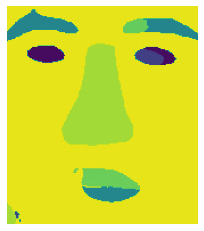

In [62]:
idx=np.random.randint(100)
exp=X[idx].reshape(192,168)
plt.imshow(exp)
plt.axis('off')

# 3. PCA decomposition and normalize data

* Use PCA to reduce dims of vectors data.
* Choose parameter of PCA model is `0.95` that's mean we'll keep only `95%` information for feature selection.
* After PCA fitting, normalize feature vectors by using `StandardSCaler()`. 

In [4]:
pca_model=PCA(0.95)
x_pca=pca_model.fit_transform(X)

(-0.5, 167.5, 191.5, -0.5)

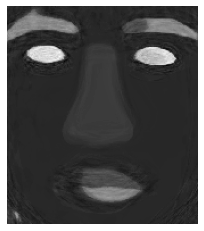

In [63]:
exp_pca=pca_model.inverse_transform(x_pca[idx]).reshape(192,168)
plt.imshow(exp_pca,cmap='binary')
plt.axis('off')

In [9]:
scaler=StandardScaler()
x_norm=scaler.fit_transform(x_pca)

# 4. Data visualization

* Visualize data distribution by using scatter plot.

In [6]:
dict_y=dict([(y,x+1) for x,y in enumerate(sorted(set(Y)))])
y=[dict_y[x] for x in Y]

Text(0.5, 1.0, 'Facial data visualization')

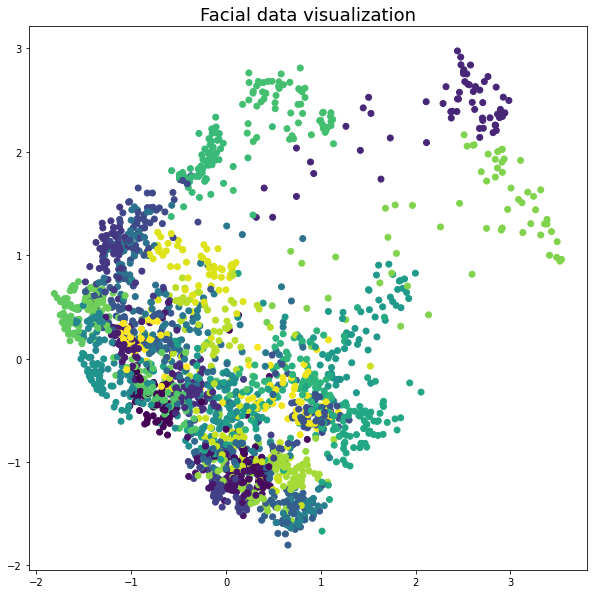

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x_norm[:,0],x_norm[:,1],c=y)
plt.title('Facial data visualization',size=18)

# 5. Model selection

* Use K-Fold cross-validation to estimate performance of model.
* We choose `k=10` for every experiments.
* K-Nearest Neighbors with `k=3`,`k=5`,`k=7`, Support Vector Machine, Logistic Regression.

In [25]:
def KFoldExperiment(model,X,Y,k=10):
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
    total_acc=[]

    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        total_acc.append(1-np.mean(y_test!=y_pred))

    return np.mean(total_acc)

In [37]:
clf_knn_3=KNeighborsClassifier(3)
clf_knn_5=KNeighborsClassifier(5)
clf_knn_7=KNeighborsClassifier(7)

clf_svm=SVC()
clf_log=LogisticRegression()

In [39]:
model=[clf_knn_3,clf_knn_5,clf_knn_7,clf_log,clf_svm]
mean_acc=[]
name_model=['KNN-3','KNN-5','KNN-7','Logistic Regression','SVM']

for i in range(len(model)):
    result=KFoldExperiment(model[i],x_norm,Y)
    mean_acc.append(result)

In [113]:
df_result=pd.DataFrame(data=[mean_acc],columns=name_model)
df_result

,KNN-3,KNN-5,KNN-7,Logistic Regression,SVM
0,0.786476,0.745007,0.705223,0.990791,0.913328


In [120]:
x=df_result.loc[0

pandas.core.series.Series

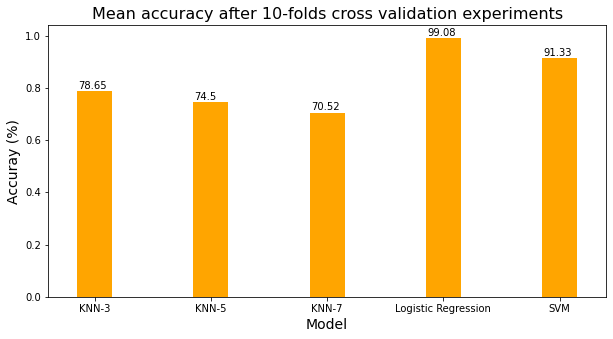

In [130]:
ax=df_result.loc[0].plot(width=0.3,kind='bar',figsize=(10,5),color='orange')
plt.title('Mean accuracy after 10-folds cross validation experiments',size=16)
plt.ylabel('Accuray (%)',size=14)
plt.xlabel('Model',size=14)
plt.xticks(rotation=0, horizontalalignment="center")
totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+0.01, i.get_height()+0.01, \
            str(round((i.get_height()*100),2)), fontsize=10,
                color='black')